## Importing scenario

In [1]:
import glob
import os
import sys

import carla
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc

%matplotlib inline

In [2]:
client = carla.Client('localhost', 2000)

In [3]:
world = client.get_world()

In [4]:
world_map = world.get_map()

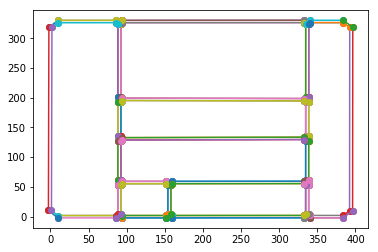

In [5]:
topology = world_map.get_topology()
for segment in topology:
    x1, y1 = segment[0].transform.location.x, segment[0].transform.location.y
    x2, y2 = segment[1].transform.location.x, segment[1].transform.location.y
    plt.plot([x1, x2], [y1, y2], marker = 'o')
plt.show()

In [6]:
topology = world_map.get_topology()
toplist = []
for segment in topology:
    x1, y1 = segment[0].transform.location.x, segment[0].transform.location.y
    x2, y2 = segment[1].transform.location.x, segment[1].transform.location.y
    toplist.append([(x1,y1),(x2,y2)])

In [7]:
len(world_map.get_topology())

160

In [8]:
import sys
sys.path.append('/home/praveen/programs/scenario_runner/')

In [9]:
from navigation.pathrouting.global_route_planner import GlobalRoutePlanner
grp = GlobalRoutePlanner(world)

In [10]:
# w = world_map.get_waypoint(carla.Location(x=120, y=1.68, z=0))

In [11]:
xo, yo = 110, -2.27
# xd, yd = 334.7, 100
# xd, yd = 130, 133
xd, yd = 334.7, 165
heading = (1, 0)

start = grp.localise(xo, yo, toplist, heading)
end= grp.localise(xd, yd, grp.topology)
graph, idmap = grp.build_graph(toplist)
route = grp.graph_search(start, end, graph, idmap)

route

[10, 12, 13, 49, 80, 81, 84, 85, 69, 70, 73, 74, 63, 65]

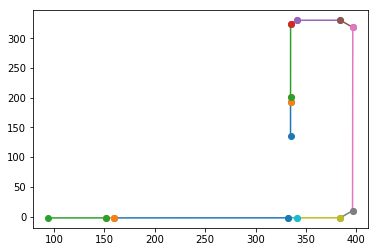

In [12]:
for i in range(1, len(route)):
    x1, y1 = graph[route[i-1]].vertex
    x2, y2 = graph[route[i]].vertex
    plt.plot([x1, x2], [y1, y2], marker = 'o')
plt.show()

In [13]:
grp.plan_route((xo, yo), heading, (xd, yd), graph, idmap, toplist)

['START',
 'GO_STRAIGHT',
 'GO_STRAIGHT',
 'LEFT',
 'LEFT',
 'LEFT',
 'GO_STRAIGHT',
 'STOP']